In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# open simulation_results.csv
simulation_results_df = pd.read_csv('simulation_results_20k.csv')
print(simulation_results_df)

                     Team  Probability
0                Duke (1)      0.18395
1             Houston (1)      0.16245
2             Florida (1)      0.13745
3              Auburn (1)      0.12670
4             Alabama (2)      0.05885
5           Tennessee (2)      0.05550
6      Michigan State (2)      0.04330
7     St. John's (NY) (2)      0.03820
8          Texas Tech (3)      0.02295
9             Arizona (4)      0.01965
10         Iowa State (3)      0.01885
11           Maryland (4)      0.01605
12            Gonzaga (8)      0.01600
13          Wisconsin (3)      0.00965
14            Clemson (5)      0.00840
15          Texas A&M (4)      0.00685
16           Kentucky (3)      0.00660
17         Louisville (8)      0.00640
18           Michigan (5)      0.00565
19             Kansas (7)      0.00555
20       Saint Mary's (7)      0.00550
21                BYU (6)      0.00450
22           Illinois (6)      0.00415
23             Purdue (4)      0.00345
24              UConn (8)

In [3]:
# load simulation_results.pkl
with open('simulation_results_20k.pkl', 'rb') as f:
    simulation_results = pickle.load(f)

In [4]:
sims = simulation_results
sims[36].players_bookkeeping['UConn']

{'Solomon Ball': {'ppg': 14.6,
  'running_total_simulated': 50.064401636746624,
  'link': '/cbb/players/solomon-ball-2.html'},
 'Liam McNeeley': {'ppg': 14.5,
  'running_total_simulated': 50.697491870636455,
  'link': '/cbb/players/liam-mcneeley-1.html'},
 'Alex Karaban': {'ppg': 14.4,
  'running_total_simulated': 73.49492023161535,
  'link': '/cbb/players/alex-karaban-1.html'},
 'Tarris Reed Jr.': {'ppg': 9.7,
  'running_total_simulated': 35.86788744504496,
  'link': '/cbb/players/tarris-reed-jr-1.html'},
 'Hassan Diarra': {'ppg': 7.9,
  'running_total_simulated': 27.491680513496732,
  'link': '/cbb/players/hassan-diarra-1.html'},
 'Samson Johnson': {'ppg': 7.4,
  'running_total_simulated': 27.741855883901987,
  'link': '/cbb/players/samson-johnson-1.html'},
 'Jaylin Stewart': {'ppg': 5.4,
  'running_total_simulated': 22.058611710846286,
  'link': '/cbb/players/jaylin-stewart-3.html'},
 'Aidan Mahaney': {'ppg': 4.5,
  'running_total_simulated': 15.832239697958217,
  'link': '/cbb/play

In [5]:
global_totals = {}

for sim in sims:
    for team, players in sim.players_bookkeeping.items():
        for player, stats in players.items():
            key = (team, player)
            global_totals.setdefault(key, []).append(stats['running_total_simulated'])

player_data = []
for (team, player), totals in global_totals.items():
    avg_total = sum(totals) / len(totals)
    player_data.append({
        'Team': team,
        'Player': player,
        'Average Running Total': avg_total
    })

# Convert to DataFrame and sort by average running total in descending order
player_stats_df = pd.DataFrame(player_data)
player_stats_df = player_stats_df.sort_values(by='Average Running Total', ascending=False)
player_stats_df.reset_index(drop=True, inplace=True)


In [6]:
# Display the DataFrame
player_stats_df.head(40)  # Show top 20 players

,Team,Player,Average Running Total
0,Yale,John Poulakidas,80.380191
1,Lipscomb,Jacob Ognacevic,71.368236
2,Marquette,Kameron Jones,70.009689
3,Gonzaga,Graham Ike,68.975110
4,Kansas,Hunter Dickinson,67.001125
5,New Mexico,Donovan Dent,65.406972
6,Yale,Nick Townsend,64.476711
7,Colorado State,Nique Clifford,63.349542
8,UC-San Diego,Aniwaniwa Tait-Jones,62.232657
9,High Point,Kezza Giffa,61.827713


In [7]:
import importlib
import select_strategy
importlib.reload(select_strategy)  # Reload the score_strategy module if needed

<module 'select_strategy' from '/Users/zsg/projects/mm25-copy/scripts/select_strategy.py'>


Evaluating Top Players strategy:
Players selected:
  - Yale: John Poulakidas
  - Lipscomb: Jacob Ognacevic
  - Marquette: Kameron Jones
  - Gonzaga: Graham Ike
  - Kansas: Hunter Dickinson
  - New Mexico: Donovan Dent
  - Yale: Nick Townsend
  - Colorado State: Nique Clifford
  - UC-San Diego: Aniwaniwa Tait-Jones
  - High Point: Kezza Giffa
  - Omaha: Marquel Sutton
  - Duke: Cooper Flagg
  - Drake: Bennett Stirtz
  - Bryant: Rafael Pinzon
  - Creighton: Ryan Kalkbrenner
Mean score: 980.20
Median score: 968.33
Standard deviation: 123.71
Min score: 631.56
Max score: 1607.74

Evaluating Mixed Strategy strategy:
Players selected:
  - Yale: John Poulakidas
  - Lipscomb: Jacob Ognacevic
  - Marquette: Kameron Jones
  - Gonzaga: Graham Ike
  - Kansas: Hunter Dickinson
  - New Mexico: Donovan Dent
  - Yale: Nick Townsend
  - Colorado State: Nique Clifford
  - UC-San Diego: Aniwaniwa Tait-Jones
  - High Point: Kezza Giffa
  - Omaha: Marquel Sutton
  - Duke: Cooper Flagg
  - Drake: Bennett St

/var/folders/32/gv3pqqj908z_m6260t1ghrxr0000gn/T/ipykernel_52964/2095657628.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[name] for name in strategies.keys()], labels=strategies.keys())


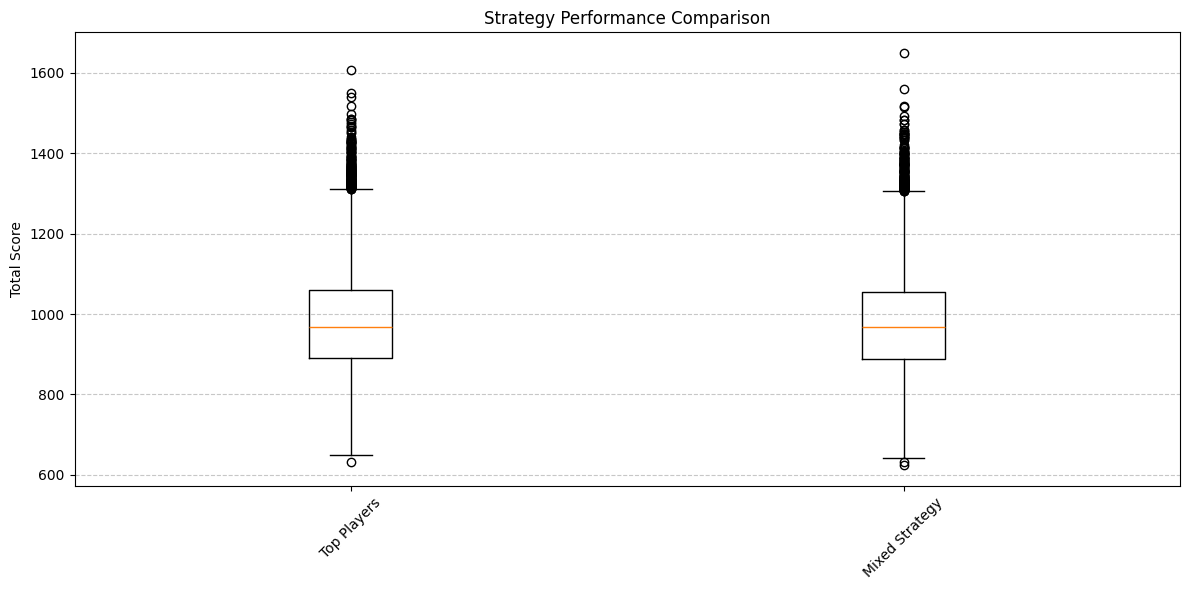

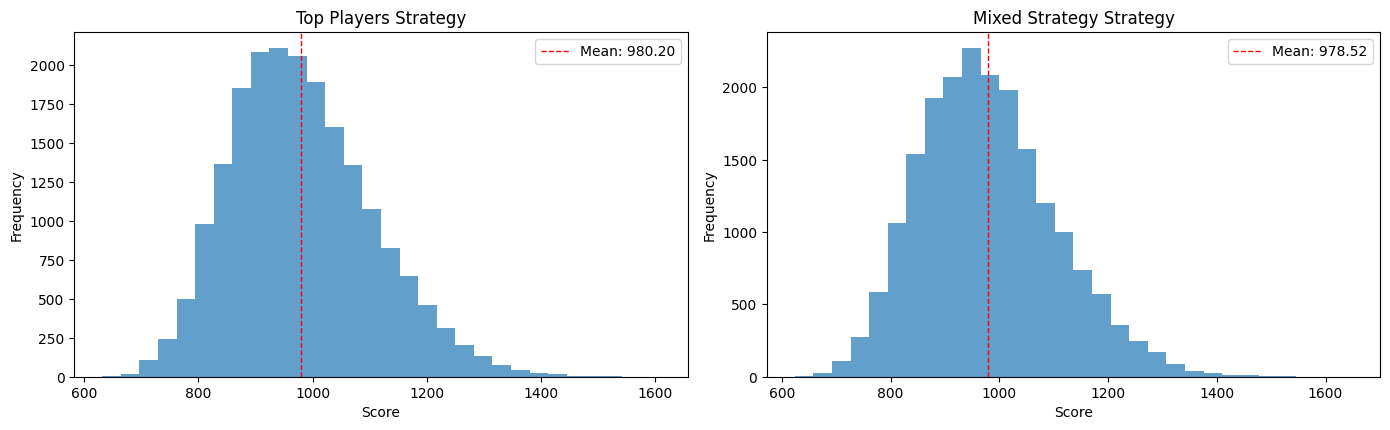

In [8]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import numpy as np
from select_strategy import score_strategy  # Assuming score_strategy is a function in select_strategy module

# Let's create a few different strategies using the top players
# Strategy 1: Top 8 players
top_players_strategy = [(row['Team'], row['Player']) for _, row in player_stats_df.head(15).iterrows()]

# Strategy 2: Mix of top and mid-tier players (more diversified)
mixed_strategy = [(row['Team'], row['Player']) for _, row in player_stats_df.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]].iterrows()]

# Strategy 3: Players from top-seeded teams (more likely to advance)

# Evaluate each strategy
strategies = {
    "Top Players": top_players_strategy,
    "Mixed Strategy": mixed_strategy,
    # "Top Seeds": top_seed_strategy,
    # "Balanced Seeds": balanced_strategy
}

results = {}
for name, strategy in strategies.items():
    print(f"\nEvaluating {name} strategy:")
    print("Players selected:")
    for team, player in strategy:
        print(f"  - {team}: {player}")
    
    # Score the strategy
    scores = score_strategy(strategy, sims)
    results[name] = scores
    
    # Calculate statistics
    mean_score = np.mean(scores)
    median_score = np.median(scores)
    std_dev = np.std(scores)
    
    print(f"Mean score: {mean_score:.2f}")
    print(f"Median score: {median_score:.2f}")
    print(f"Standard deviation: {std_dev:.2f}")
    print(f"Min score: {min(scores):.2f}")
    print(f"Max score: {max(scores):.2f}")

# Visualize the results with box plots
plt.figure(figsize=(12, 6))
plt.boxplot([results[name] for name in strategies.keys()], labels=strategies.keys())
plt.title('Strategy Performance Comparison')
plt.ylabel('Total Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Also create a histogram to see the distribution of scores for each strategy
plt.figure(figsize=(14, 8))
for i, (name, scores) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.hist(scores, bins=30, alpha=0.7)
    plt.title(f'{name} Strategy')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(scores), color='r', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(scores):.2f}')
    plt.legend()
plt.tight_layout()
plt.show()

In [9]:
import seaborn as sns

This code:
Creates a function analyze_player_performance that extracts a specific player's scores across all simulations
Analyzes the top player from your DataFrame (you can change this to any player you're interested in)
Calculates and displays key statistics for the player:
Mean score
Median score
Standard deviation
Min and max scores
Range of scores
Creates three visualizations:
A histogram with KDE overlay showing the distribution of the player's scores
A box plot showing the distribution in a more compact form
A violin plot comparing the distributions of the top 5 players
These visualizations will help you understand:
How consistent a player's performance is across simulations
The range of possible outcomes for that player
How the player compares to other top performers
Whether the player has a normal distribution or if there are multiple modes
This analysis can be particularly useful for identifying players who not only have high average scores but also consistent performance across different tournament scenarios.

In [10]:
print(sims[0].players_bookkeeping['Yale'])

{'John Poulakidas': {'ppg': 19.2, 'running_total_simulated': 30.052476764785997, 'link': '/cbb/players/john-poulakidas-1.html'}, 'Nick Townsend': {'ppg': 15.4, 'running_total_simulated': 33.52515418497511, 'link': '/cbb/players/nick-townsend-1.html'}, 'Bez Mbeng': {'ppg': 13.4, 'running_total_simulated': 32.94407132237328, 'link': '/cbb/players/bez-mbeng-1.html'}, 'Casey Simmons': {'ppg': 8.7, 'running_total_simulated': 24.389282060468503, 'link': '/cbb/players/casey-simmons-1.html'}, 'Samson Aletan': {'ppg': 7.7, 'running_total_simulated': 20.173894401375826, 'link': '/cbb/players/samson-aletan-1.html'}, 'Isaac Celiscar': {'ppg': 7.0, 'running_total_simulated': 24.63870675952357, 'link': '/cbb/players/isaac-celiscar-1.html'}, 'Yassine Gharram': {'ppg': 6.4, 'running_total_simulated': 16.14249215496428, 'link': '/cbb/players/yassine-gharram-1.html'}, 'Riley Fox': {'ppg': 3.4, 'running_total_simulated': 13.844857896259914, 'link': '/cbb/players/riley-fox-1.html'}, 'Trevor Mullin': {'ppg

Analyzing performance distribution for John Poulakidas from Yale
Statistics for John Poulakidas:
Mean score: 80.38
Median score: 63.84
Standard deviation: 41.09
Min score: 11.48
Max score: 280.78
Range: 269.30


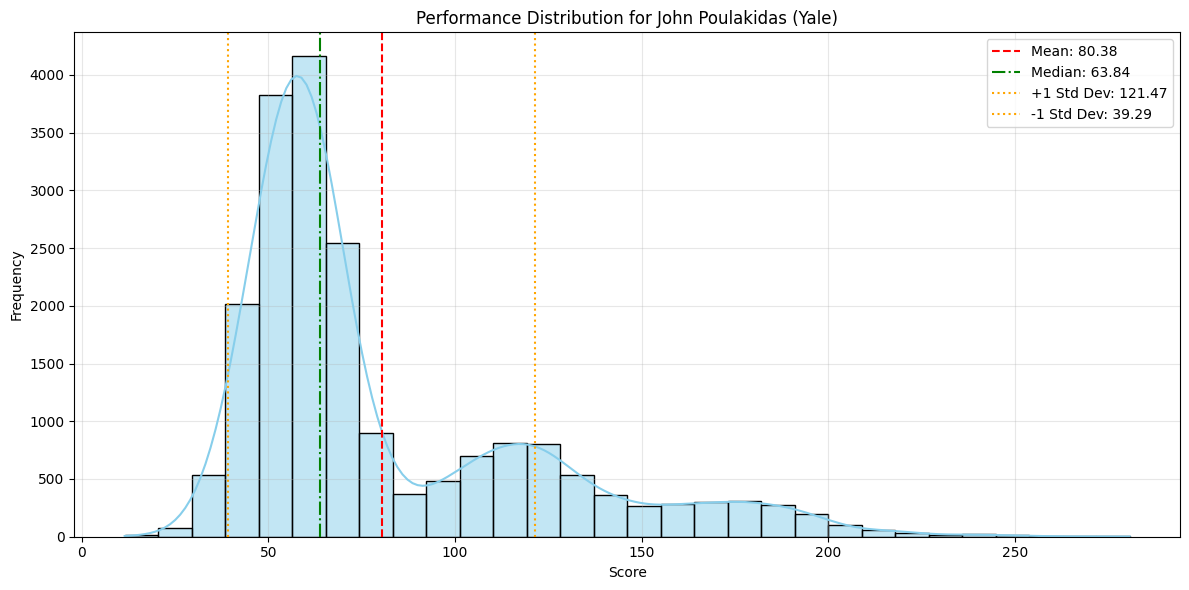

Analyzing performance distribution for Jacob Ognacevic from Lipscomb
Statistics for Jacob Ognacevic:
Mean score: 71.37
Median score: 62.96
Standard deviation: 30.82
Min score: 17.91
Max score: 284.20
Range: 266.28


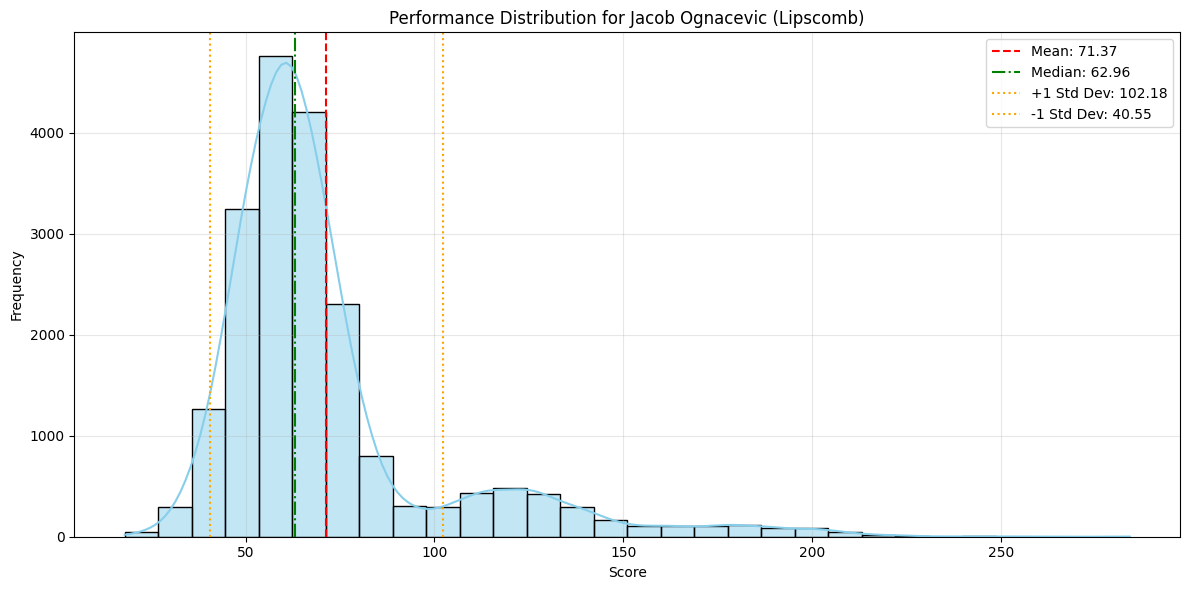

Analyzing performance distribution for Kameron Jones from Marquette
Statistics for Kameron Jones:
Mean score: 70.01
Median score: 67.61
Standard deviation: 34.20
Min score: 10.97
Max score: 204.63
Range: 193.67


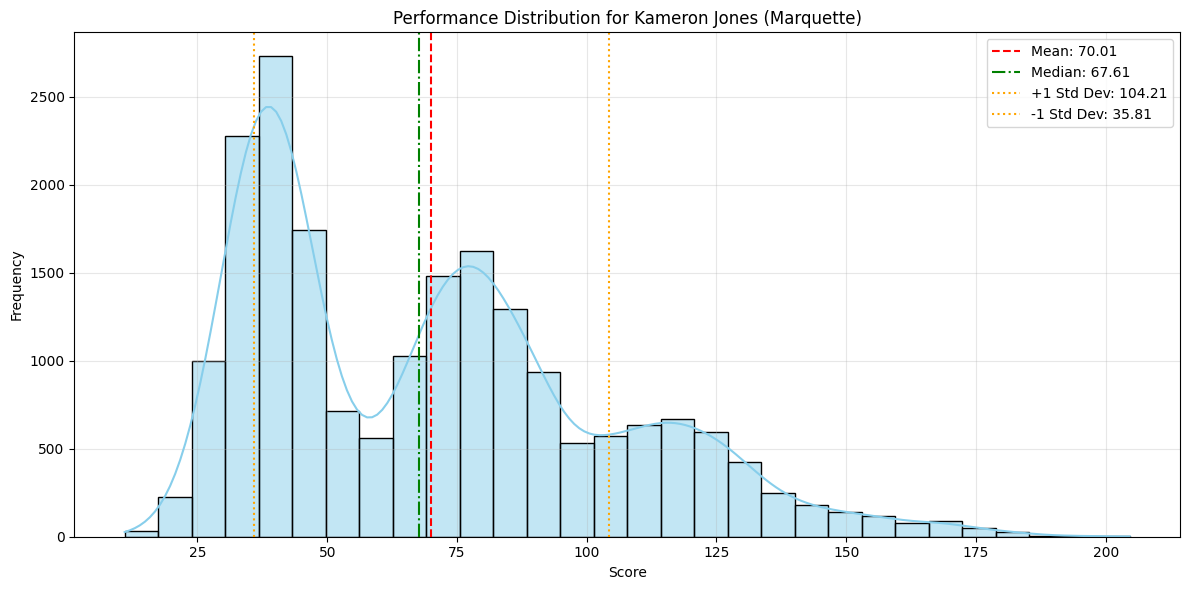

Analyzing performance distribution for Graham Ike from Gonzaga
Statistics for Graham Ike:
Mean score: 68.98
Median score: 66.62
Standard deviation: 31.71
Min score: 6.01
Max score: 179.28
Range: 173.27


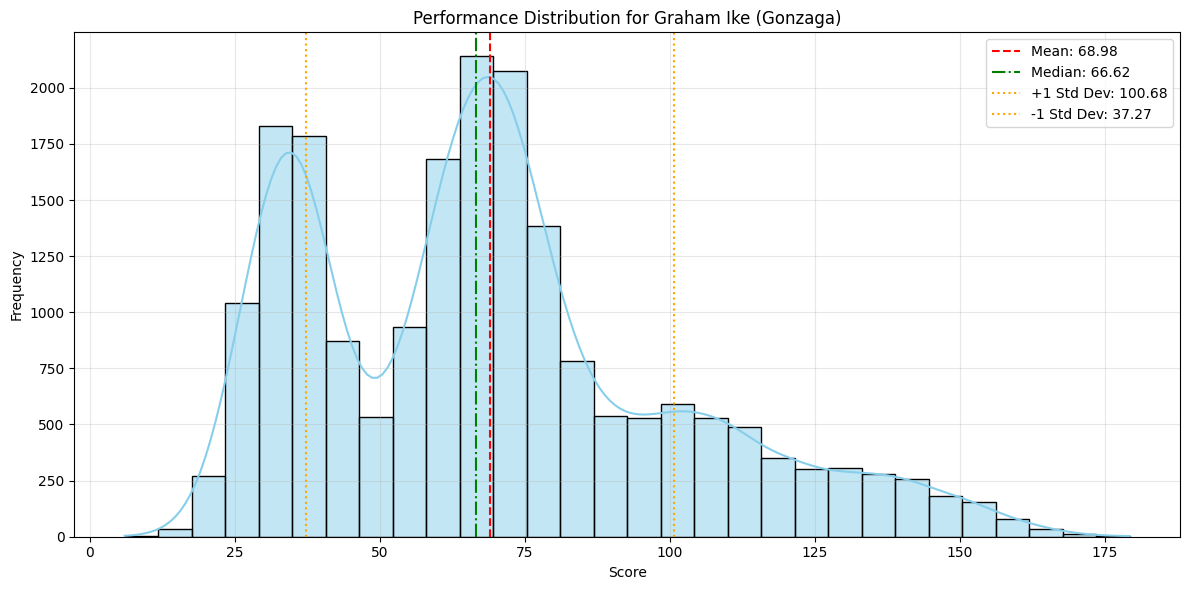

Analyzing performance distribution for Hunter Dickinson from Kansas
Statistics for Hunter Dickinson:
Mean score: 67.00
Median score: 65.23
Standard deviation: 32.22
Min score: 7.54
Max score: 180.54
Range: 173.00


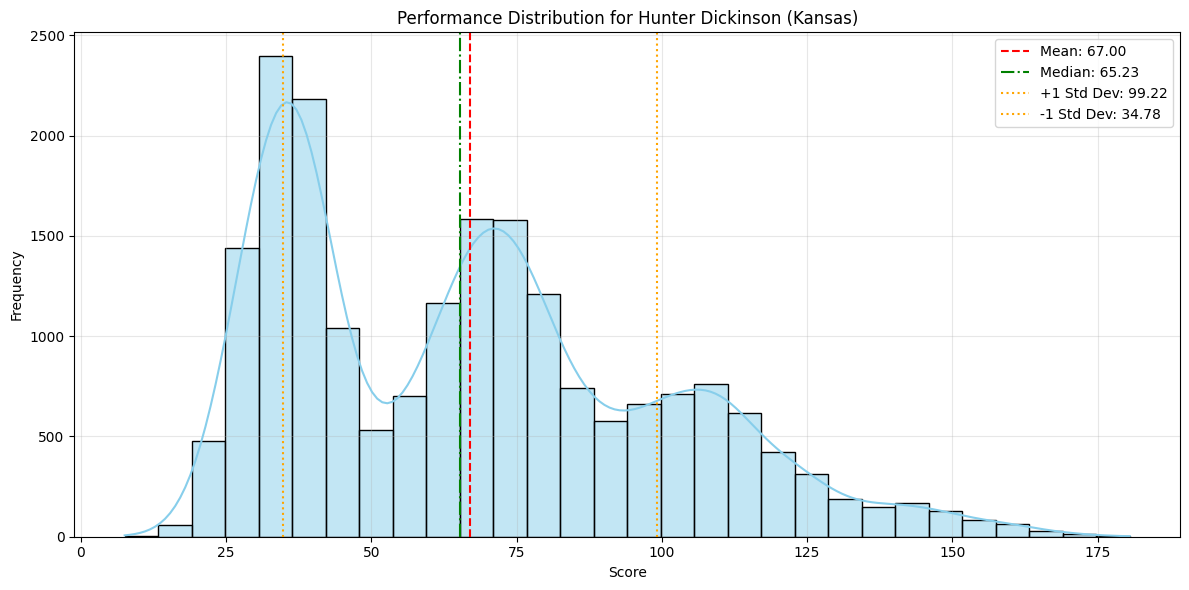

Analyzing performance distribution for Donovan Dent from New Mexico
Statistics for Donovan Dent:
Mean score: 65.41
Median score: 50.71
Standard deviation: 33.30
Min score: 9.78
Max score: 239.37
Range: 229.59


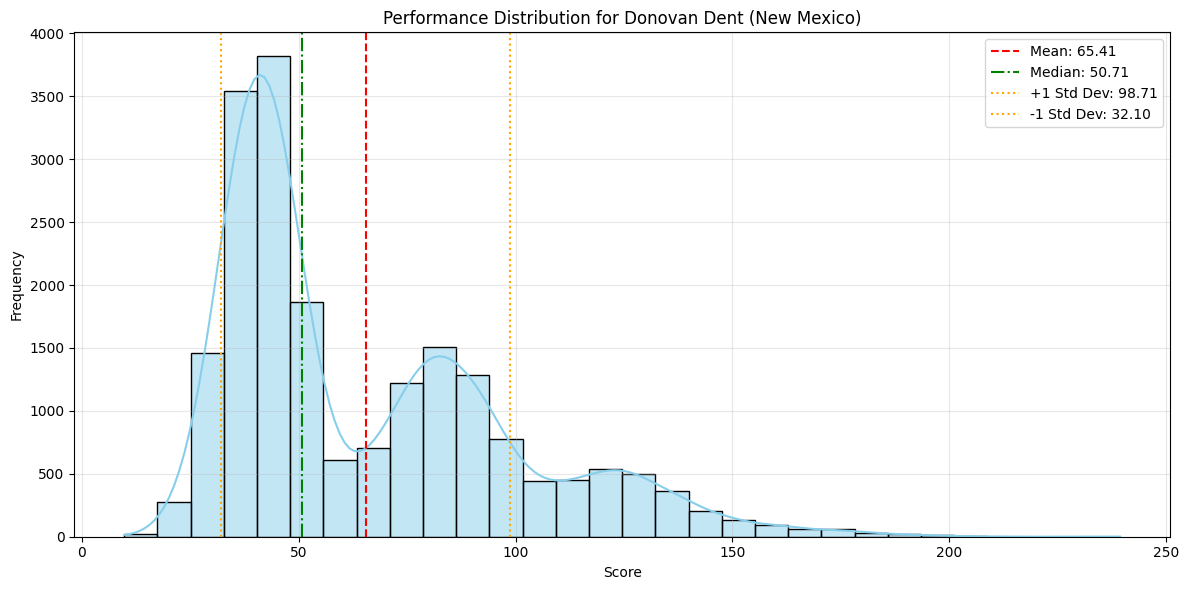

Analyzing performance distribution for Nick Townsend from Yale
Statistics for Nick Townsend:
Mean score: 64.48
Median score: 51.26
Standard deviation: 32.88
Min score: 11.65
Max score: 229.77
Range: 218.12


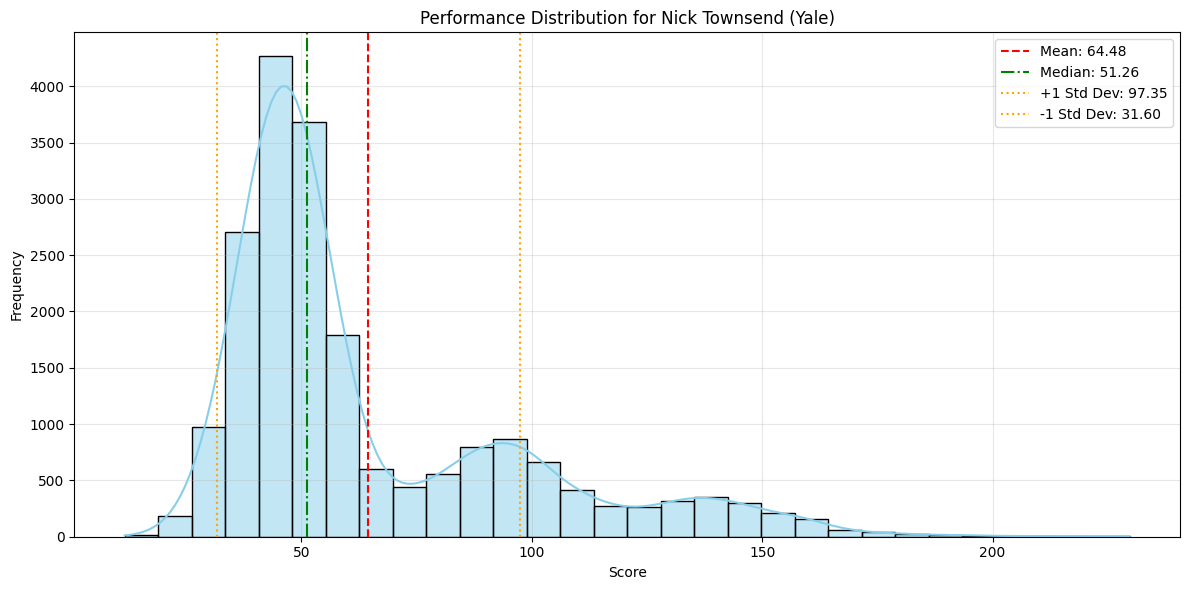

Analyzing performance distribution for Nique Clifford from Colorado State
Statistics for Nique Clifford:
Mean score: 63.35
Median score: 50.35
Standard deviation: 31.92
Min score: 7.56
Max score: 192.73
Range: 185.17


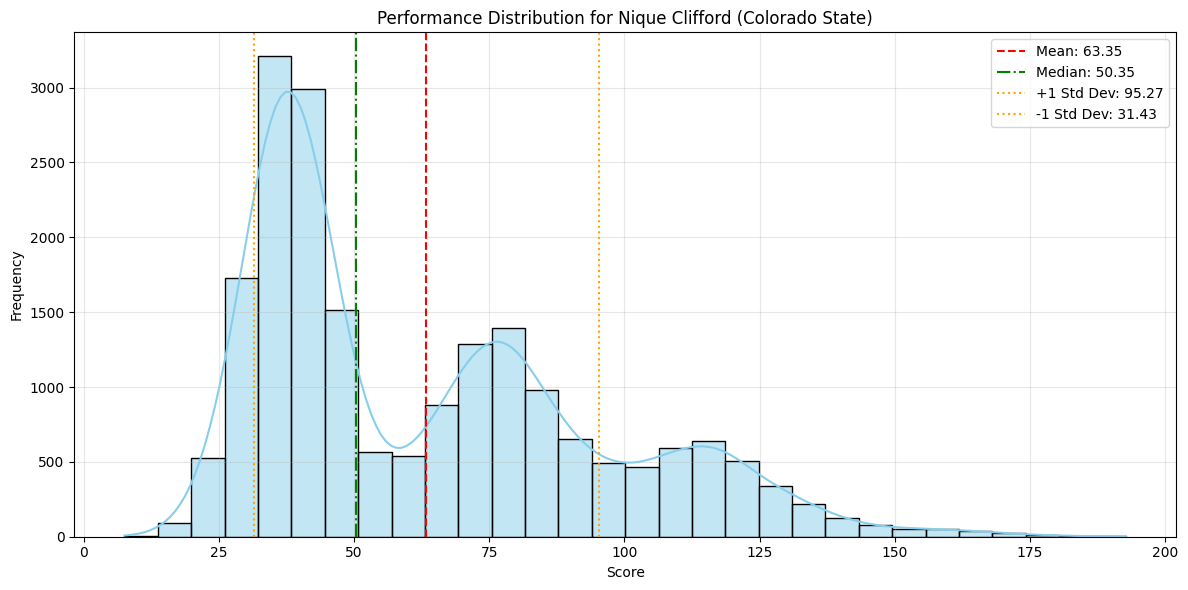

Analyzing performance distribution for Aniwaniwa Tait-Jones from UC-San Diego
Statistics for Aniwaniwa Tait-Jones:
Mean score: 62.23
Median score: 46.33
Standard deviation: 33.40
Min score: 10.23
Max score: 204.42
Range: 194.19


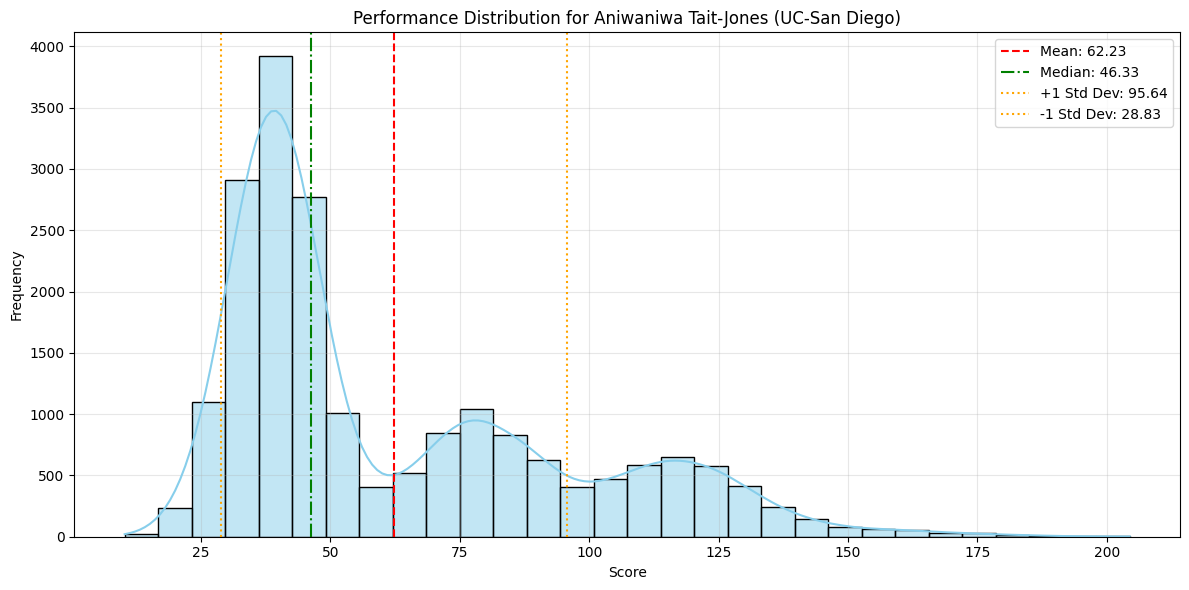

Analyzing performance distribution for Kezza Giffa from High Point
Statistics for Kezza Giffa:
Mean score: 61.83
Median score: 49.42
Standard deviation: 30.87
Min score: 11.90
Max score: 211.05
Range: 199.15


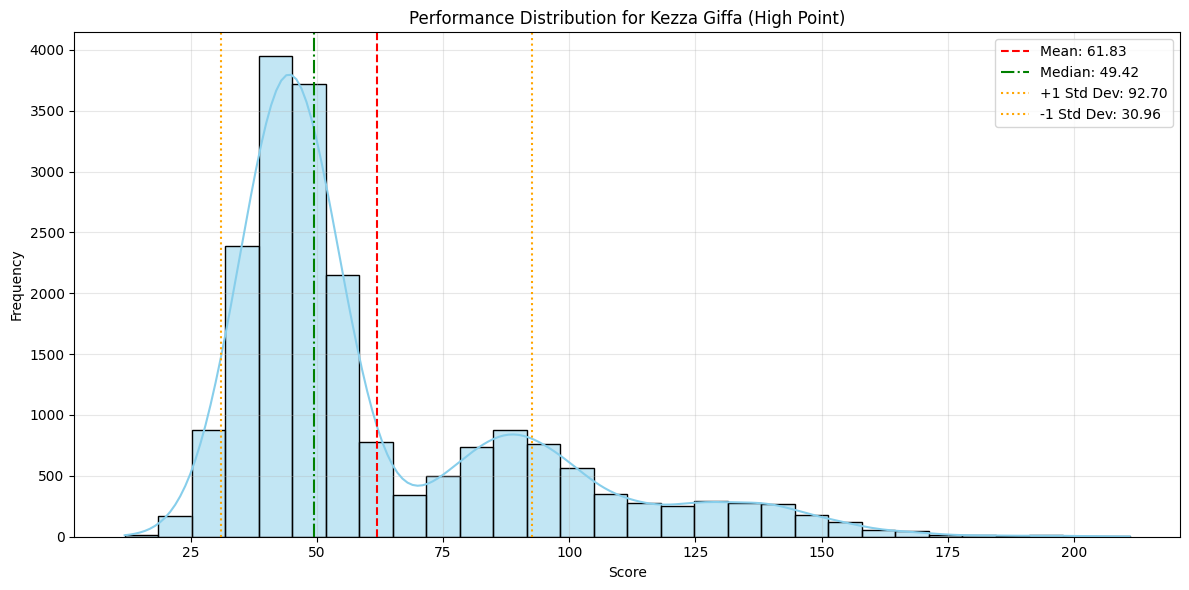

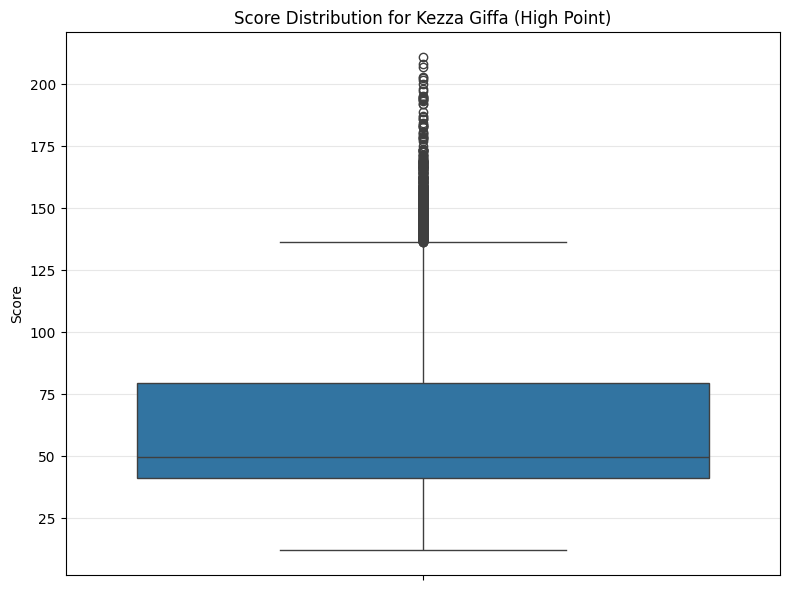

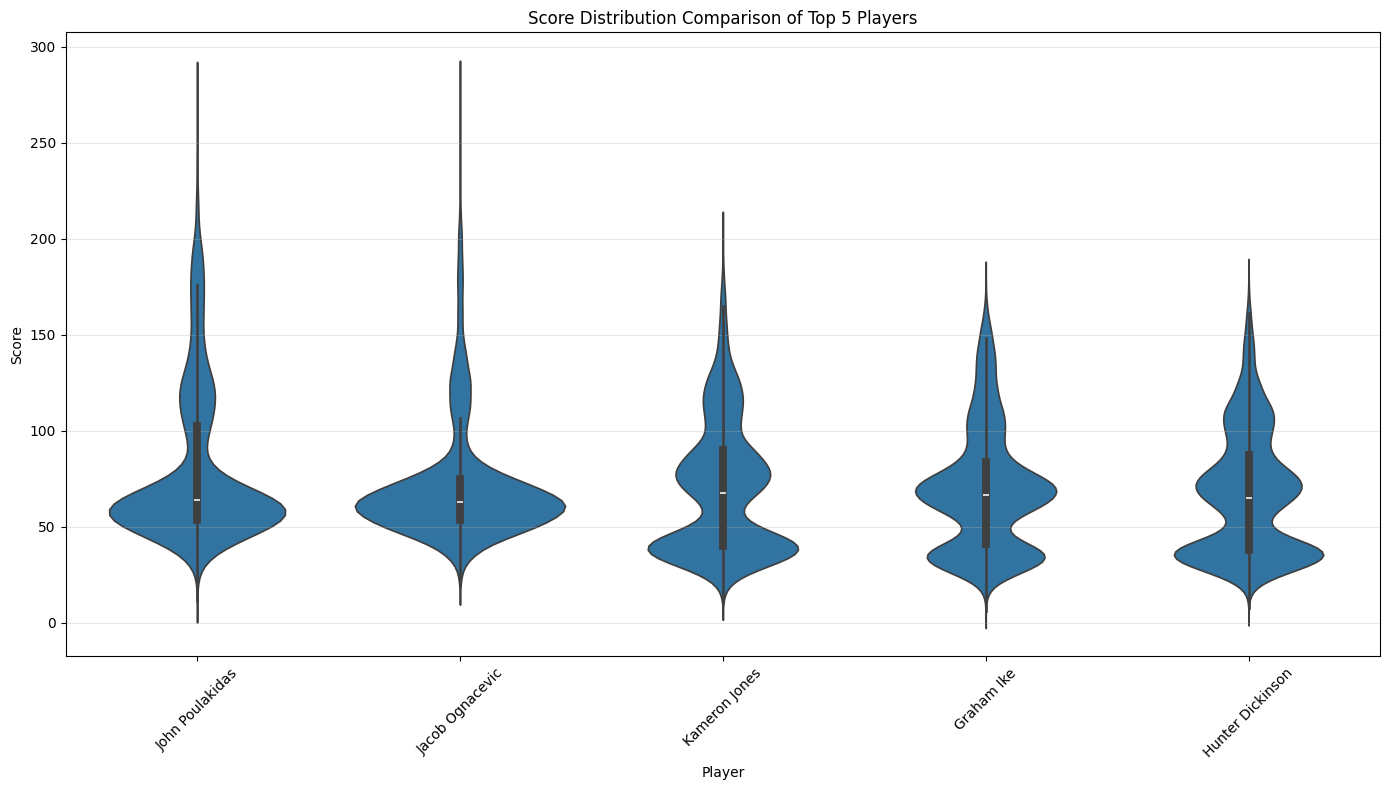

In [11]:
# Function to get a player's performance distribution across all simulations
def analyze_player_performance(team, player, sims):
    """
    Analyze a single player's performance across all simulations.
    
    Args:
        team (str): The team name
        player (str): The player name
        sims (list): List of simulation objects
    
    Returns:
        list: List of player's scores across all simulations
    """
    scores = []
    for sim in sims:
        try:
            # Extract player's score from this simulation
            player_score = sim.players_bookkeeping[team][player]['running_total_simulated']
            scores.append(player_score)
        except KeyError:
            # Handle case where player might not exist in some simulations
            print(f"Warning: {player} from {team} not found in a simulation")
            continue
    
    return scores

# Let's analyze a top player (you can change this to any player you're interested in)
# Get the top player from the DataFrame
for i in range(10):
    top_player_row = player_stats_df.iloc[i]
    team = top_player_row['Team']
    player = top_player_row['Player']

    print(f"Analyzing performance distribution for {player} from {team}")
    player_scores = analyze_player_performance(team, player, sims)

    # Calculate statistics
    mean_score = np.mean(player_scores)
    median_score = np.median(player_scores)
    std_dev = np.std(player_scores)
    min_score = min(player_scores)
    max_score = max(player_scores)

    print(f"Statistics for {player}:")
    print(f"Mean score: {mean_score:.2f}")
    print(f"Median score: {median_score:.2f}")
    print(f"Standard deviation: {std_dev:.2f}")
    print(f"Min score: {min_score:.2f}")
    print(f"Max score: {max_score:.2f}")
    print(f"Range: {max_score - min_score:.2f}")

    # Create a histogram with KDE (Kernel Density Estimation) overlay
    plt.figure(figsize=(12, 6))

    # Histogram
    sns.histplot(player_scores, kde=True, bins=30, color='skyblue')

    # Add vertical lines for key statistics
    plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
    plt.axvline(median_score, color='green', linestyle='-.', label=f'Median: {median_score:.2f}')
    plt.axvline(mean_score + std_dev, color='orange', linestyle=':', label=f'+1 Std Dev: {mean_score + std_dev:.2f}')
    plt.axvline(mean_score - std_dev, color='orange', linestyle=':', label=f'-1 Std Dev: {mean_score - std_dev:.2f}')

    plt.title(f'Performance Distribution for {player} ({team})')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create a box plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=player_scores)
plt.title(f'Score Distribution for {player} ({team})')
plt.ylabel('Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Compare with other top players
num_players_to_compare = 5
top_players = player_stats_df.head(num_players_to_compare)

comparison_data = []
for _, row in top_players.iterrows():
    team = row['Team']
    player = row['Player']
    scores = analyze_player_performance(team, player, sims)
    for score in scores:
        comparison_data.append({'Team': team, 'Player': player, 'Score': score})

comparison_df = pd.DataFrame(comparison_data)

# Create violin plot to compare distributions
plt.figure(figsize=(14, 8))
sns.violinplot(data=comparison_df, x='Player', y='Score', inner='box')
plt.title(f'Score Distribution Comparison of Top {num_players_to_compare} Players')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Analyzing performance distribution for Marquel Sutton from Omaha
Statistics for Marquel Sutton:
Mean score: 61.59
Median score: 58.42
Standard deviation: 20.61
Min score: 13.17
Max score: 243.50
Range: 230.33


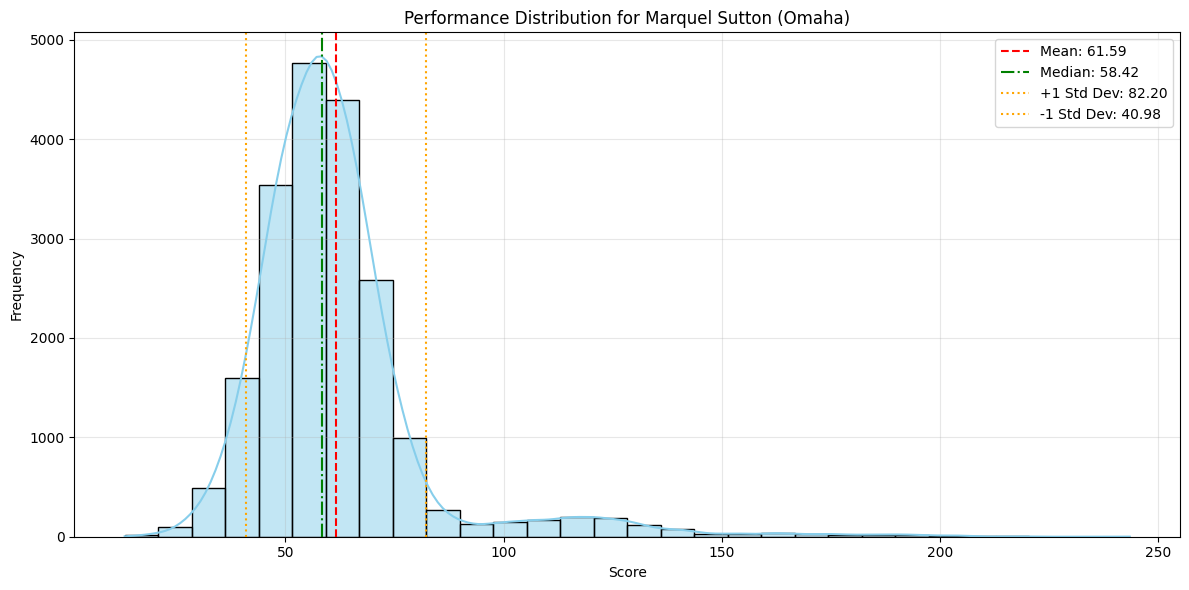

Analyzing performance distribution for Cooper Flagg from Duke
Statistics for Cooper Flagg:
Mean score: 61.45
Median score: 62.60
Standard deviation: 16.22
Min score: 10.28
Max score: 105.17
Range: 94.89


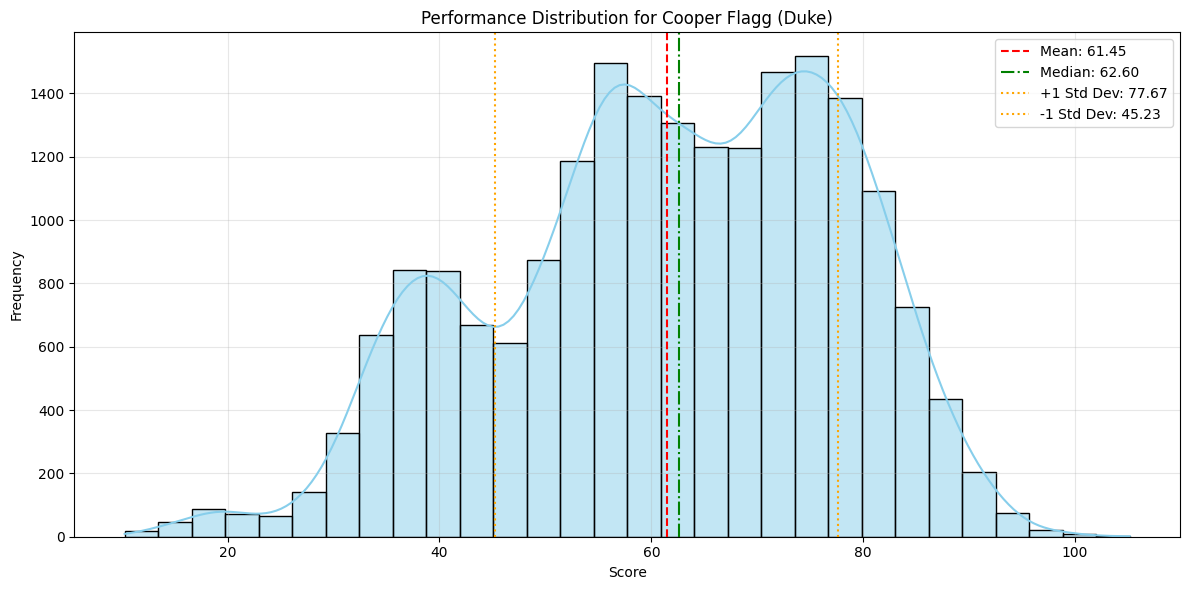

Analyzing performance distribution for Bennett Stirtz from Drake
Statistics for Bennett Stirtz:
Mean score: 61.07
Median score: 47.25
Standard deviation: 31.02
Min score: 7.69
Max score: 188.76
Range: 181.07


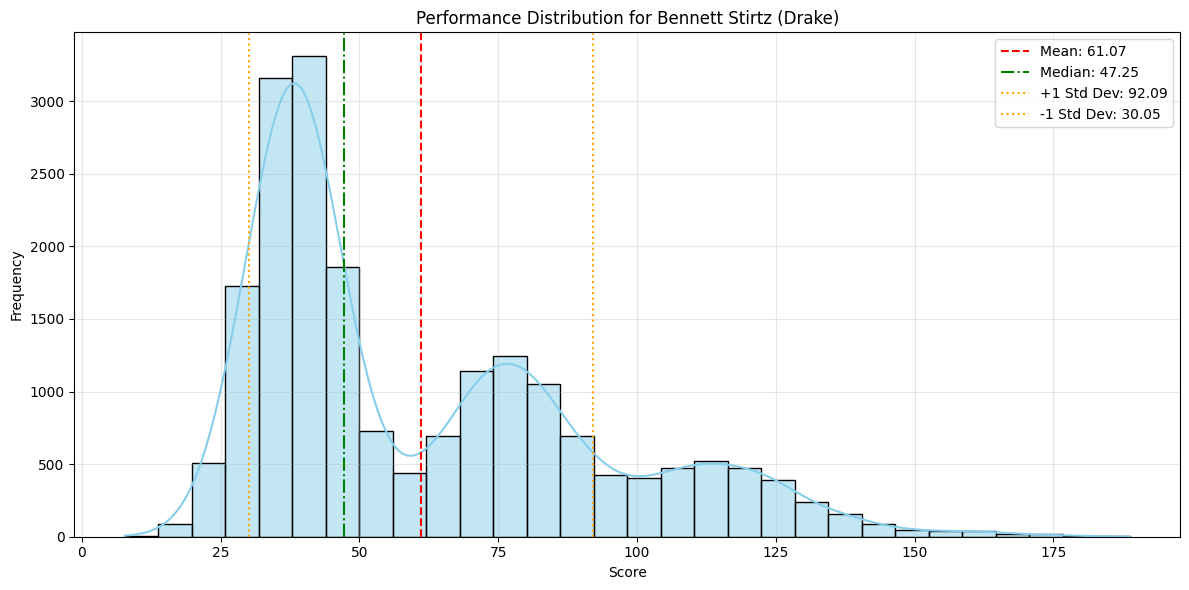

Analyzing performance distribution for Rafael Pinzon from Bryant
Statistics for Rafael Pinzon:
Mean score: 60.98
Median score: 56.78
Standard deviation: 22.60
Min score: 8.29
Max score: 244.28
Range: 235.99


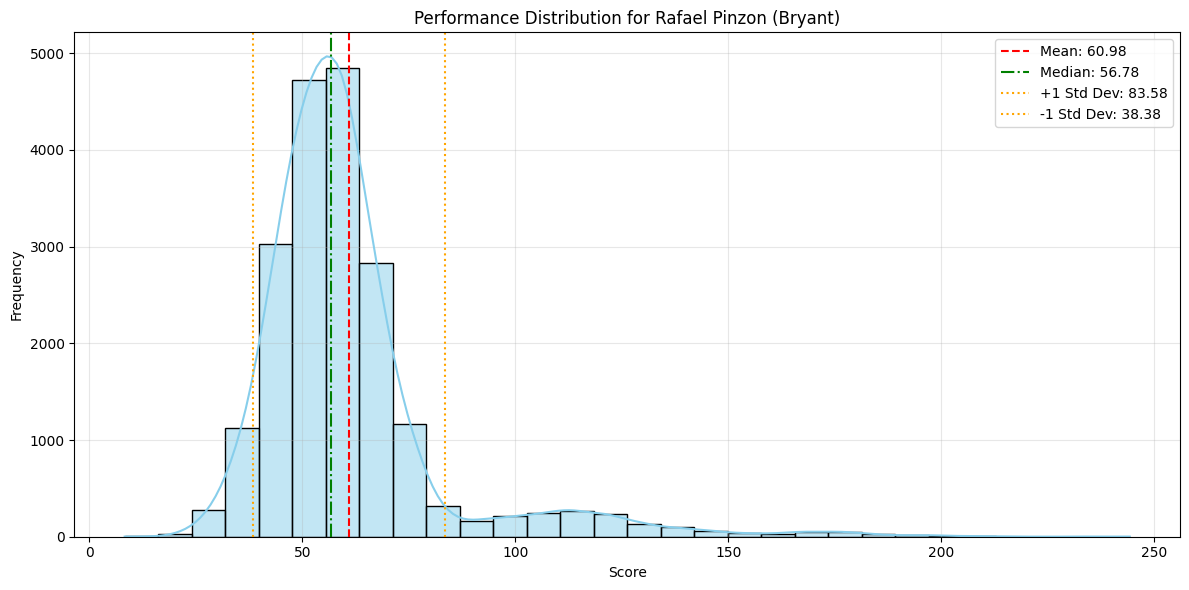

Analyzing performance distribution for Ryan Kalkbrenner from Creighton
Statistics for Ryan Kalkbrenner:
Mean score: 60.07
Median score: 47.61
Standard deviation: 29.77
Min score: 10.77
Max score: 196.54
Range: 185.77


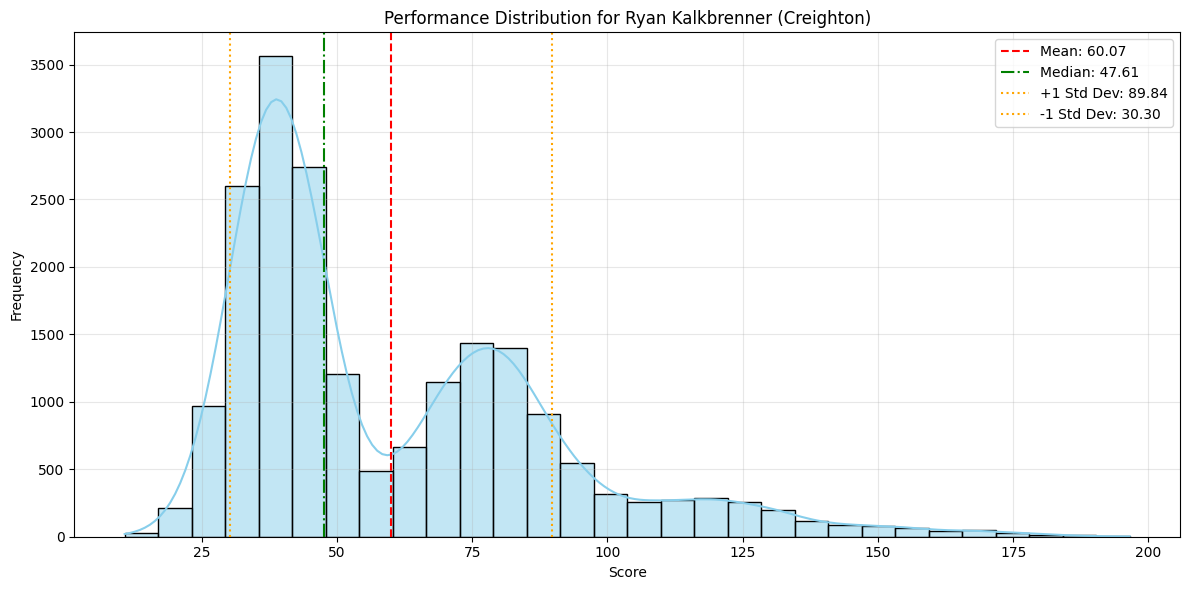

In [12]:
for i in range(10, 15):
    top_player_row = player_stats_df.iloc[i]
    team = top_player_row['Team']
    player = top_player_row['Player']

    print(f"Analyzing performance distribution for {player} from {team}")
    player_scores = analyze_player_performance(team, player, sims)

    # Calculate statistics
    mean_score = np.mean(player_scores)
    median_score = np.median(player_scores)
    std_dev = np.std(player_scores)
    min_score = min(player_scores)
    max_score = max(player_scores)

    print(f"Statistics for {player}:")
    print(f"Mean score: {mean_score:.2f}")
    print(f"Median score: {median_score:.2f}")
    print(f"Standard deviation: {std_dev:.2f}")
    print(f"Min score: {min_score:.2f}")
    print(f"Max score: {max_score:.2f}")
    print(f"Range: {max_score - min_score:.2f}")

    # Create a histogram with KDE (Kernel Density Estimation) overlay
    plt.figure(figsize=(12, 6))

    # Histogram
    sns.histplot(player_scores, kde=True, bins=30, color='skyblue')

    # Add vertical lines for key statistics
    plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
    plt.axvline(median_score, color='green', linestyle='-.', label=f'Median: {median_score:.2f}')
    plt.axvline(mean_score + std_dev, color='orange', linestyle=':', label=f'+1 Std Dev: {mean_score + std_dev:.2f}')
    plt.axvline(mean_score - std_dev, color='orange', linestyle=':', label=f'-1 Std Dev: {mean_score - std_dev:.2f}')

    plt.title(f'Performance Distribution for {player} ({team})')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

Top 20 Players by Standard Deviation:


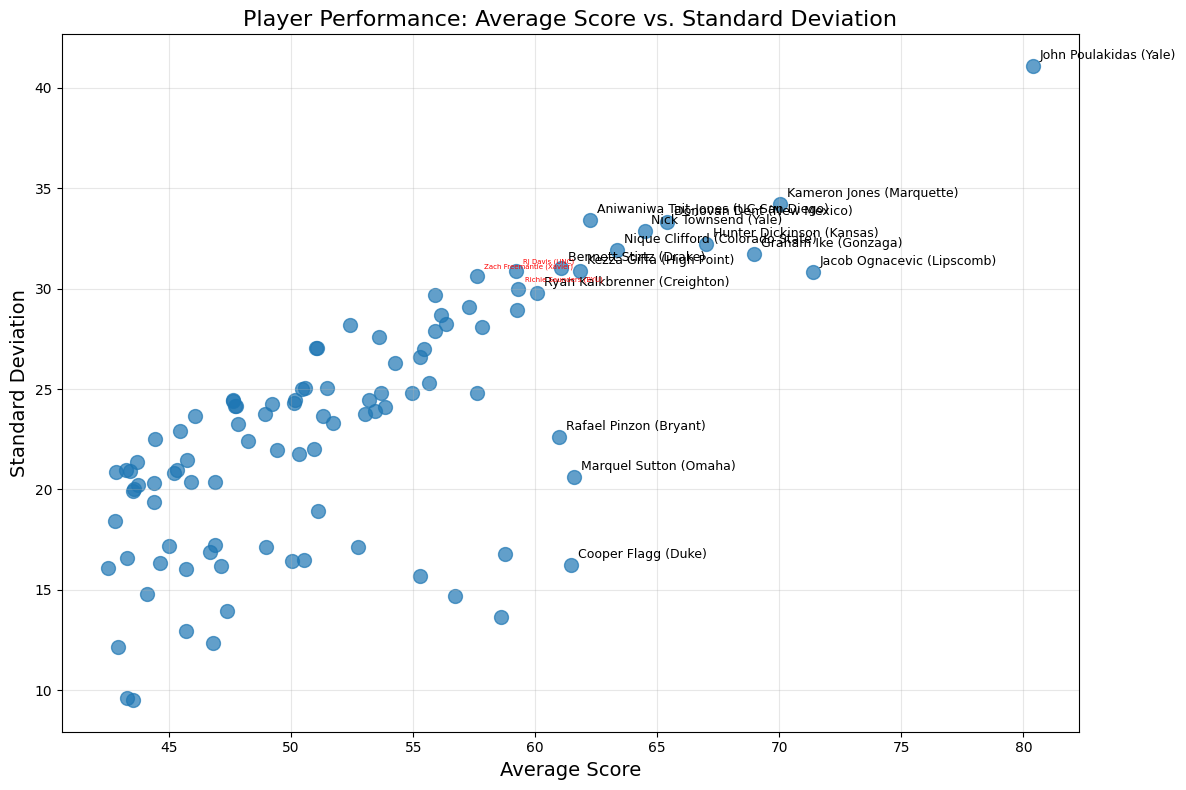


High Variance Strategy:
Mean Score: 972.32
Standard Deviation: 129.52
Min Score: 596.04
Max Score: 1593.83
Range: 997.78

Players in High Variance Strategy:
  Yale            | John Poulakidas      | Avg: 80.38 | Std: 41.09
  Marquette       | Kameron Jones        | Avg: 70.01 | Std: 34.20
  UC-San Diego    | Aniwaniwa Tait-Jones | Avg: 62.23 | Std: 33.40
  New Mexico      | Donovan Dent         | Avg: 65.41 | Std: 33.30
  Yale            | Nick Townsend        | Avg: 64.48 | Std: 32.88
  Kansas          | Hunter Dickinson     | Avg: 67.00 | Std: 32.22
  Colorado State  | Nique Clifford       | Avg: 63.35 | Std: 31.92
  Gonzaga         | Graham Ike           | Avg: 68.98 | Std: 31.71
  Drake           | Bennett Stirtz       | Avg: 61.07 | Std: 31.02
  UNC             | RJ Davis             | Avg: 59.23 | Std: 30.90
  High Point      | Kezza Giffa          | Avg: 61.83 | Std: 30.87
  Lipscomb        | Jacob Ognacevic      | Avg: 71.37 | Std: 30.82
  Xavier          | Zach Freemantle   

/var/folders/32/gv3pqqj908z_m6260t1ghrxr0000gn/T/ipykernel_52964/296208193.py:138: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_var_scores, label=f'High Variance Strategy (μ={high_var_mean:.2f})', shade=True)
/var/folders/32/gv3pqqj908z_m6260t1ghrxr0000gn/T/ipykernel_52964/296208193.py:139: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(top_perf_scores, label=f'Top Performers Strategy (μ={top_perf_mean:.2f})', shade=True)


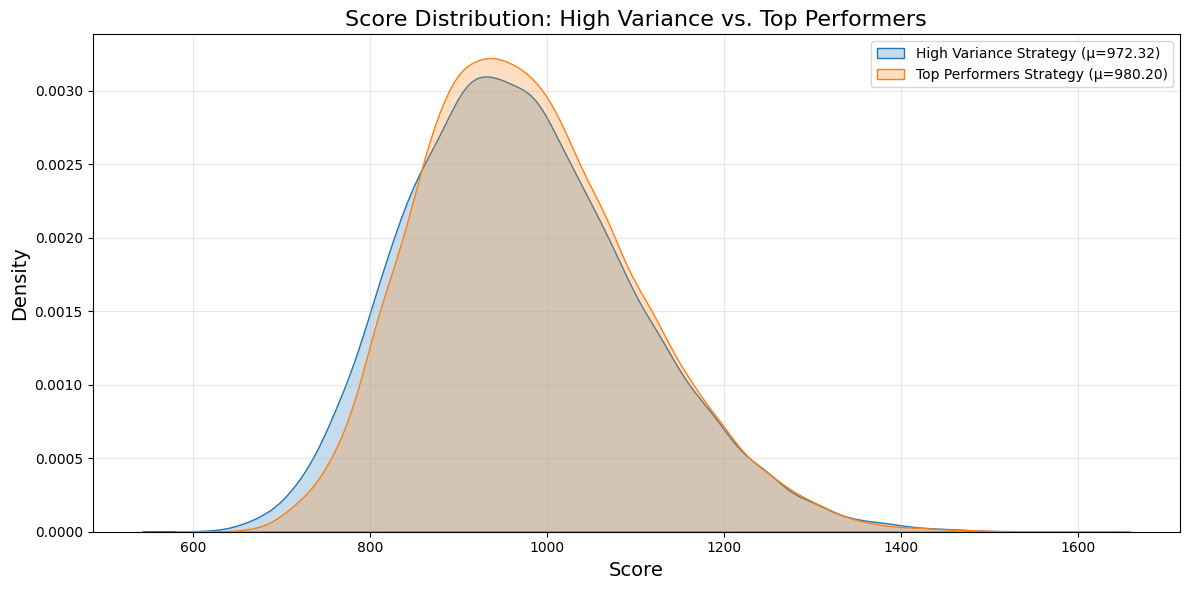

In [13]:
# Function to calculate player variance across simulations
def calculate_player_variance(player_stats_df, sims, top_n=100):
    """
    Calculate variance for top N players across all simulations.
    
    Args:
        player_stats_df: DataFrame with player stats
        sims: List of simulation objects
        top_n: Number of top players to analyze
    
    Returns:
        DataFrame with players and their variance metrics
    """
    # Get top N players
    top_players = player_stats_df.head(top_n)
    
    player_variance_data = []
    for _, row in top_players.iterrows():
        team = row['Team']
        player = row['Player']
        avg_score = row['Average Running Total']
        
        # Get all scores across simulations
        scores = []
        for sim in sims:
            try:
                player_score = sim.players_bookkeeping[team][player]['running_total_simulated']
                scores.append(player_score)
            except KeyError:
                continue
        
        if scores:
            # Calculate variance metrics
            variance = np.var(scores)
            std_dev = np.std(scores)
            cv = std_dev / avg_score if avg_score > 0 else 0  # Coefficient of variation
            range_score = max(scores) - min(scores)
            
            player_variance_data.append({
                'Team': team,
                'Player': player,
                'Average Score': avg_score,
                'Variance': variance,
                'Std Dev': std_dev,
                'CV': cv,  # Coefficient of variation (normalized std dev)
                'Range': range_score,
                'Min': min(scores),
                'Max': max(scores)
            })
    
    # Convert to DataFrame
    variance_df = pd.DataFrame(player_variance_data)
    
    return variance_df

# Calculate variance for top 100 players
variance_df = calculate_player_variance(player_stats_df, sims, top_n=100)

# Sort by standard deviation (descending)
high_variance_players = variance_df.sort_values('Std Dev', ascending=False).reset_index(drop=True)

# Display top high-variance players
print("Top 20 Players by Standard Deviation:")
high_variance_players[['Team', 'Player', 'Average Score', 'Std Dev', 'CV', 'Range']].head(20)

# Create a scatterplot of Average Score vs. Standard Deviation
plt.figure(figsize=(12, 8))
plt.scatter(
    variance_df['Average Score'], 
    variance_df['Std Dev'],
    alpha=0.7,
    s=100  # Marker size
)

# Add labels to points
for i, row in variance_df.head(15).iterrows():  # Label top 15 players by average score
    plt.annotate(
        f"{row['Player']} ({row['Team']})",
        (row['Average Score'], row['Std Dev']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9
    )

# Also label top 15 high-variance players
for i, row in high_variance_players.head(15).iterrows():
    if row['Player'] not in variance_df.head(15)['Player'].values:  # Avoid duplicates
        plt.annotate(
            f"{row['Player']} ({row['Team']})",
            (row['Average Score'], row['Std Dev']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=5,
            color='red'
        )

plt.title('Player Performance: Average Score vs. Standard Deviation', fontsize=16)
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('Standard Deviation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a high-variance strategy (15 players with highest standard deviation)
high_variance_strategy = [(row['Team'], row['Player']) 
                          for _, row in high_variance_players.head(15).iterrows()]

# Score the high-variance strategy
high_var_scores = score_strategy(high_variance_strategy, sims)
high_var_mean = np.mean(high_var_scores)
high_var_std = np.std(high_var_scores)

print(f"\nHigh Variance Strategy:")
print(f"Mean Score: {high_var_mean:.2f}")
print(f"Standard Deviation: {high_var_std:.2f}")
print(f"Min Score: {min(high_var_scores):.2f}")
print(f"Max Score: {max(high_var_scores):.2f}")
print(f"Range: {max(high_var_scores) - min(high_var_scores):.2f}")

print("\nPlayers in High Variance Strategy:")
for team, player in high_variance_strategy:
    # Get player's stats
    player_row = variance_df[(variance_df['Team'] == team) & (variance_df['Player'] == player)].iloc[0]
    print(f"  {team:15s} | {player:20s} | Avg: {player_row['Average Score']:.2f} | Std: {player_row['Std Dev']:.2f}")

# Compare high-variance vs. top performers strategies
# Create a strategy using top 15 players by average score
top_performers_strategy = [(row['Team'], row['Player']) 
                           for _, row in player_stats_df.head(15).iterrows()]

# Score the top performers strategy
top_perf_scores = score_strategy(top_performers_strategy, sims)
top_perf_mean = np.mean(top_perf_scores)
top_perf_std = np.std(top_perf_scores)

# Plot distribution comparison
plt.figure(figsize=(12, 6))
sns.kdeplot(high_var_scores, label=f'High Variance Strategy (μ={high_var_mean:.2f})', shade=True)
sns.kdeplot(top_perf_scores, label=f'Top Performers Strategy (μ={top_perf_mean:.2f})', shade=True)
plt.title('Score Distribution: High Variance vs. Top Performers', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
import itertools
import random

In [15]:
test1 = player_stats_df.head(5)
test2 = [(row['Team'], row['Player']) for _, row in test1.iterrows()]

for s in random.sample(list(itertools.combinations(test2, 3)), 5):
    for t, p in s:
        print (f"Team: {t}, Player: {p}")
    print("---")

Team: Yale, Player: John Poulakidas
Team: Lipscomb, Player: Jacob Ognacevic
Team: Kansas, Player: Hunter Dickinson
---
Team: Yale, Player: John Poulakidas
Team: Gonzaga, Player: Graham Ike
Team: Kansas, Player: Hunter Dickinson
---
Team: Yale, Player: John Poulakidas
Team: Marquette, Player: Kameron Jones
Team: Kansas, Player: Hunter Dickinson
---
Team: Yale, Player: John Poulakidas
Team: Marquette, Player: Kameron Jones
Team: Gonzaga, Player: Graham Ike
---
Team: Yale, Player: John Poulakidas
Team: Lipscomb, Player: Jacob Ognacevic
Team: Marquette, Player: Kameron Jones
---


100%|██████████| 36000/36000 [2:29:05<00:00,  4.02it/s]   


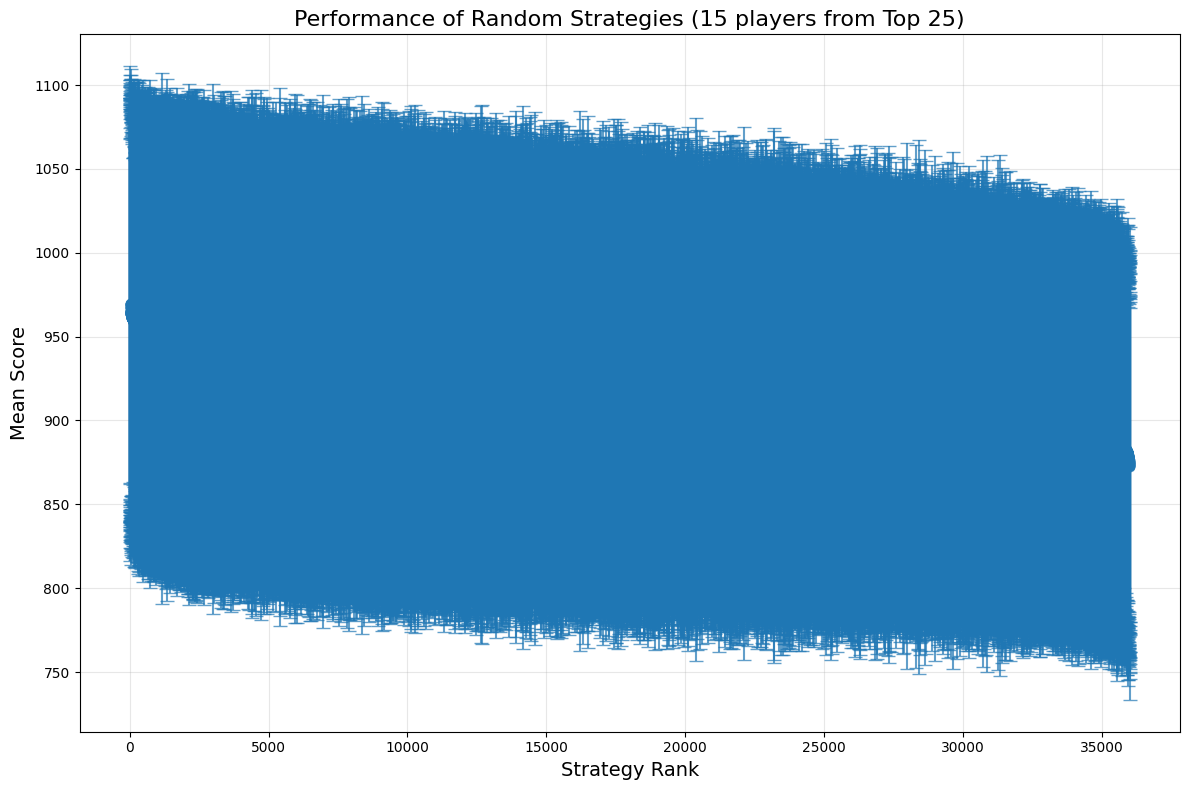

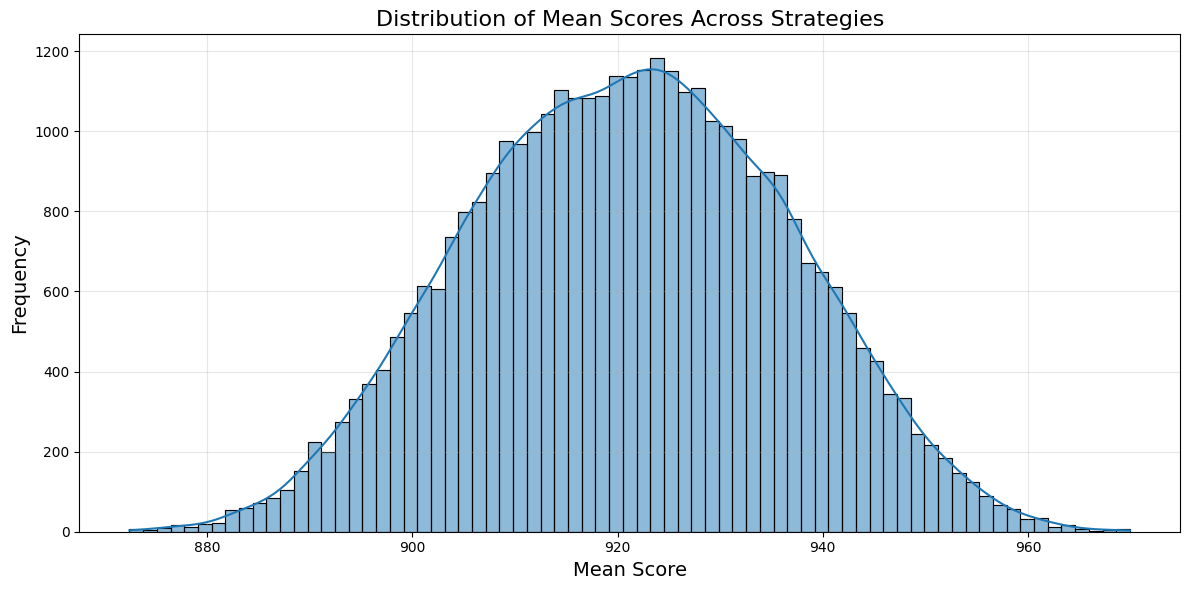

Top 10 Strategies by Mean Score:

Strategy 1 (Mean: 969.93, Std: 131.05):
  Lipscomb        | Jacob Ognacevic      | Avg: 71.37
  Marquette       | Kameron Jones        | Avg: 70.01
  Gonzaga         | Graham Ike           | Avg: 68.98
  Kansas          | Hunter Dickinson     | Avg: 67.00
  Colorado State  | Nique Clifford       | Avg: 63.35
  UC-San Diego    | Aniwaniwa Tait-Jones | Avg: 62.23
  Drake           | Bennett Stirtz       | Avg: 61.07
  Creighton       | Ryan Kalkbrenner     | Avg: 60.07
  Louisville      | Terrence Edwards     | Avg: 59.24
  Louisville      | Chucky Hepburn       | Avg: 57.83
  Illinois        | Kasparas Jakucionis  | Avg: 57.30
  High Point      | D'maurian Williams   | Avg: 56.34
  Yale            | Bez Mbeng            | Avg: 56.15
  High Point      | Kimani Hamilton      | Avg: 55.88
  Mississippi State | Josh Hubbard         | Avg: 55.65

Strategy 2 (Mean: 969.71, Std: 124.48):
  Lipscomb        | Jacob Ognacevic      | Avg: 71.37
  Marquette       |

In [16]:
from select_strategy import score_strategy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

# Get the top 50 players from our dataframe
top_50_players = player_stats_df.head(50)
top_50_tuples = [(row['Team'], row['Player']) for _, row in top_50_players.iterrows()]
top_30_players = player_stats_df.head(30)
top_30_tuples = [(row['Team'], row['Player']) for _, row in top_30_players.iterrows()]

# generate all random combinations of 15 players from the top 25
top_30_combinations = random.sample(list(itertools.combinations(top_30_tuples, 15)), 36000)

# Function to generate a random strategy of 15 players from the top 50
def generate_random_strategy():
    # return random.sample(top_50_tuples, 15)
    return random.sample(top_30_tuples, 15)  # For a more conservative strategy, use top 25

# num_strategies = 100000
strategy_results = []

# for i in tqdm(range(num_strategies)):
for strategy in tqdm(top_30_combinations):
    scores = score_strategy(strategy, sims)
    
    # Calculate statistics for this strategy
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    min_score = np.min(scores)
    max_score = np.max(scores)
    
    strategy_results.append({
        'strategy_id': i,
        'strategy': strategy,
        'mean_score': mean_score,
        'std_score': std_score,
        'min_score': min_score,
        'max_score': max_score,
        'scores': scores
    })

# Convert results to DataFrame for easier analysis
strategy_df = pd.DataFrame([
    {
        'strategy_id': r['strategy_id'],
        'mean_score': r['mean_score'],
        'std_score': r['std_score'],
        'min_score': r['min_score'],
        'max_score': r['max_score']
    } for r in strategy_results
])

# Sort strategies by mean score
strategy_df = strategy_df.sort_values('mean_score', ascending=False).reset_index(drop=True)

# Visualize the results
plt.figure(figsize=(12, 8))

# Plot mean scores with error bars showing standard deviation
plt.errorbar(
    x=strategy_df.index,
    y=strategy_df['mean_score'],
    yerr=strategy_df['std_score'],
    fmt='o',
    alpha=0.7,
    capsize=5
)

plt.title(f'Performance of Random Strategies (15 players from Top {25})', fontsize=16)
plt.xlabel('Strategy Rank', fontsize=14)
plt.ylabel('Mean Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Histogram of mean scores
plt.figure(figsize=(12, 6))
sns.histplot(strategy_df['mean_score'], kde=True)
plt.title('Distribution of Mean Scores Across Strategies', fontsize=16)
plt.xlabel('Mean Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the top 5 strategies
print("Top 10 Strategies by Mean Score:")
for i in range(10):
    strategy_id = int(strategy_df.iloc[i]['strategy_id'])
    strategy = strategy_results[strategy_id]['strategy']
    mean_score = strategy_df.iloc[i]['mean_score']
    std_score = strategy_df.iloc[i]['std_score']
    
    print(f"\nStrategy {i+1} (Mean: {mean_score:.2f}, Std: {std_score:.2f}):")
    for team, player in strategy:
        # Find the player's average running total
        avg_total = player_stats_df[(player_stats_df['Team'] == team) & 
                                   (player_stats_df['Player'] == player)]['Average Running Total'].values[0]
        print(f"  {team:15s} | {player:20s} | Avg: {avg_total:.2f}")

In [17]:
strategy_df.head(10)['strategy_id']  # Display the top 10 strategies with their mean scores and standard deviations

0    14
1    14
2    14
3    14
4    14
5    14
6    14
7    14
8    14
9    14
Name: strategy_id, dtype: int64

In [ ]:
strategy_results[30]['strategy']

(('Purdue', 'Zach Edey'),
 ('Morehead State', 'Riley Minix'),
 ('Colorado', 'KJ Simpson'),
 ('Drake', 'Tucker DeVries'),
 ('Stetson', 'Jalen Blackmon'),
 ('South Dakota State', 'Zeke Mayo'),
 ('Grand Canyon', 'Tyon Grant-Foster'),
 ('Texas A&M', 'Wade Taylor IV'),
 ('Florida', 'Walter Clayton Jr.'),
 ('UNC', 'RJ Davis'),
 ('Nevada', 'Jarod Lucas'),
 ('Texas', 'Max Abmas'),
 ('Illinois', 'Terrence Shannon Jr.'),
 ('NC State', 'DJ Horne'),
 ('Long Beach State', 'Marcus Tsohonis'))